Import libraries

In [2]:
# Install additional libraries in Colab
!pip install lightgbm catboost

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.cluster.hierarchy import linkage, dendrogram
from pandas.plotting import andrews_curves
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
# Column Transformer
from sklearn.compose import ColumnTransformer
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Confirm environment readiness
print("Libraries imported successfully, ready for Google Colab.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00
Libraries imported successfully, ready for Google Colab.


In [8]:
from google.colab import files
uploaded = files.upload()  # For uploading datasets


Saving liver_cirrhosis.csv to liver_cirrhosis.csv


Dataset Overview

In [10]:
# Install necessary libraries (specific to Colab)
!pip install colorama

# Import Libraries
import pandas as pd
from io import StringIO
from IPython.display import display, HTML
from colorama import Fore, Style

# Define the functions
def styled_heading(text, background_color='#282828', text_color='#FFD700'):
    return f"""
    <div style="
        text-align: center;
        background: {background_color};
        font-family: 'Montserrat', sans-serif;
        color: {text_color};
        padding: 15px;
        font-size: 24px;
        font-weight: bold;
        line-height: 1.5;
        border-radius: 15px;
        margin: 20px 10px;
        box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3);
        border: 2px solid {text_color};
        max-width: 100%;
        word-wrap: break-word;
    ">
        {text}
    </div>
    <style>
    @media (max-width: 600px) {{
        div {{
            font-size: 20px;
            padding: 10px;
        }}
    }}
    </style>
    """

def print_error(message):
    display(HTML(styled_heading("Error", background_color='#B22222', text_color='white')))
    print(f"An error occurred: {message}")

def data_peek(df):
    try:
        # Display head and tail of the dataset
        for heading, df_part, bg_color, text_color in zip(
            ["The Head Of Dataset is:", "The Tail Of Dataset is:", "Numerical Summary of Data:"],
            [df.head(5), df.tail(5), df.describe()],
            ['#4B0082', '#006400', '#8B4513'],
            ['#FFFFFF', '#FFD700', '#FFFFFF']
        ):
            display(HTML(styled_heading(heading, background_color=bg_color, text_color=text_color)))
            display(HTML(df_part.to_html(index=False)))
            print()

        # Print shape data
        display(HTML(styled_heading("Shape Data:", background_color='#4682B4', text_color='#FFFFFF')))
        print(f'{Fore.CYAN}Shape of the Data: {Style.BRIGHT + str(df.shape) + Style.RESET_ALL}')
        print(f'{Fore.CYAN}Rows: {df.shape[0]}{Style.RESET_ALL}')
        print(f'{Fore.CYAN}Columns: {df.shape[1]}{Style.RESET_ALL}')
        print()

        # Print info of the data
        display(HTML(styled_heading("Info Of Data:", background_color='#2E8B57', text_color='#FFFFFF')))
        buffer = StringIO()
        df.info(buf=buffer)
        buffer.seek(0)
        info_str = buffer.read()
        display(HTML(f"<pre style='margin-bottom: 20px; font-family: Courier, monospace; font-size: 14px;'>{info_str}</pre>"))
        print()

        # Print categorical columns
        cat_cols = [col for col in df.columns if df[col].dtype == 'O']
        display(HTML(styled_heading("Categorical Columns of Data:", background_color='#D2691E', text_color='#FFFFFF')))
        print(f'{Fore.LIGHTMAGENTA_EX}The Categorical Columns of Data are:{Style.RESET_ALL} {cat_cols}')
        print()

        # Print numerical columns
        num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
        display(HTML(styled_heading("Numerical Columns of Data:", background_color='#8A2BE2', text_color='#FFFFFF')))
        print(f'{Fore.LIGHTMAGENTA_EX}The Numerical Columns of Data are:{Style.RESET_ALL} {num_cols}')
        print()

        # Print null values
        display(HTML(styled_heading("Null Values in Data:", background_color='#FF4500', text_color='#FFFFFF')))
        null_values = df.isnull().sum()
        display(HTML(f"<pre style='margin-bottom: 20px; font-family: Courier, monospace; font-size: 14px;'>{null_values}</pre>"))
        print()

        # Print duplicates check
        display(HTML(styled_heading("Duplicates Check in Data:", background_color='#4169E1', text_color='#FFFFFF')))
        duplicates_count = df.duplicated().sum()
        if duplicates_count > 0:
            print(f'{Fore.RED}Duplicates exist in the dataset. Total duplicates: {duplicates_count}{Style.RESET_ALL}')
        else:
            print(f'{Fore.GREEN}No duplicates found in the dataset.{Style.RESET_ALL}')
        print()

    except Exception as e:
        print_error(str(e))

# Load the already available dataset
dataset_path = "liver_cirrhosis.csv"  # Replace with the actual path to your dataset
df = pd.read_csv(dataset_path)

# Get an overview of the dataset
data_peek(df)


Shape of the Data: (25000, 19)
Rows: 25000
Columns: 19



The Categorical Columns of Data are: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']



The Numerical Columns of Data are: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']



Duplicates exist in the dataset. Total duplicates: 15361



Removing Duplicate Rows

In [11]:
# Check the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Drop the duplicate rows
df_cleaned = df.drop_duplicates()

# Verify if duplicates are dropped
num_duplicates_after = df_cleaned.duplicated().sum()
print(f'Number of duplicate rows after dropping: {num_duplicates_after}')

Number of duplicate rows: 15361
Number of duplicate rows after dropping: 0


Binning of Age Column

In [12]:
# Binning/Discretization of Age
bins = [0, 25, 35, 45, 100]  # Define age bins
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']  # Define labels for bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [13]:
!pip install joypy

Lets have a look at Boxplot


*   This code is used to determine the distribution of categorical variables in the DataFrame by creating 2x2 grid of countplots. Create Subplots: Firstly I created a grid of subplots with 2 rows and 2 columns.

* Plot Four Countplots:Then I create Four countplots of Status, Drug, Sex and Ascites and added to each subplot



* Adjust the Layout: Then I adjust the layout of the subplots to avoid overlapping.

*  Displaying the Plot: Finally I display the plot using plt.show()





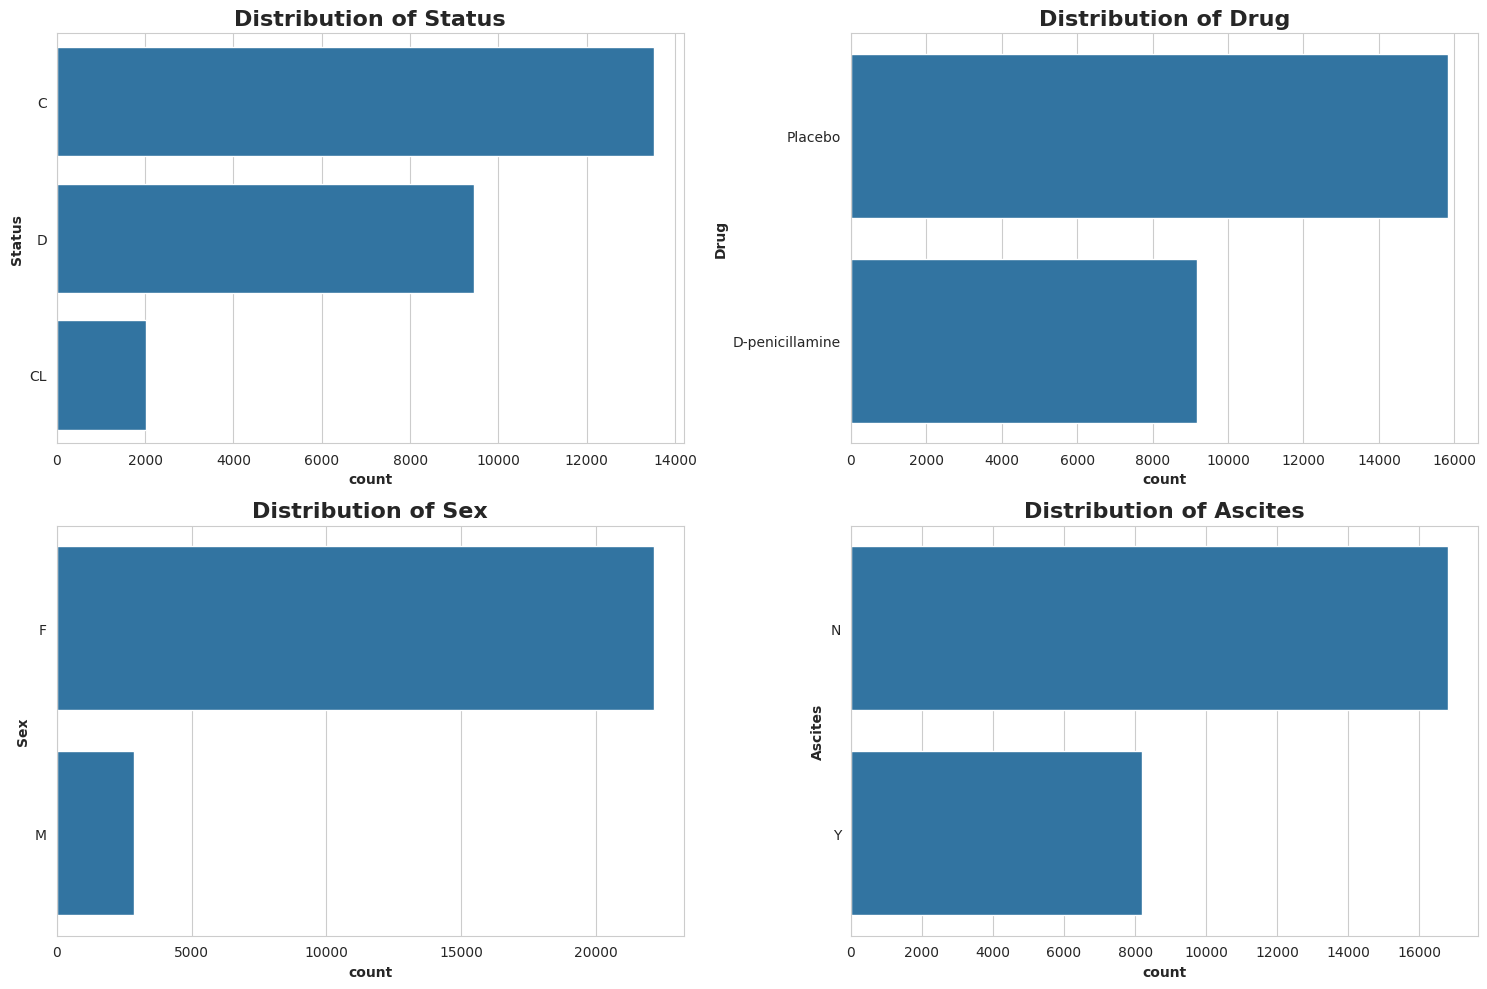

In [14]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'Status'
sns.countplot(y='Status', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Status', fontweight='bold', fontsize=16)
axes[0, 0].set_xlabel(axes[0, 0].get_xlabel(), fontweight='bold')
axes[0, 0].set_ylabel(axes[0, 0].get_ylabel(), fontweight='bold')

# Plot for 'Drug'
sns.countplot(y='Drug', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Drug', fontweight='bold', fontsize=16)
axes[0, 1].set_xlabel(axes[0, 1].get_xlabel(), fontweight='bold')
axes[0, 1].set_ylabel(axes[0, 1].get_ylabel(), fontweight='bold')

# Plot for 'Sex'
sns.countplot(y='Sex', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sex', fontweight='bold', fontsize=16)
axes[1, 0].set_xlabel(axes[1, 0].get_xlabel(), fontweight='bold')
axes[1, 0].set_ylabel(axes[1, 0].get_ylabel(), fontweight='bold')

# Plot for 'Ascites'
sns.countplot(y='Ascites', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Ascites', fontweight='bold', fontsize=16)
axes[1, 1].set_xlabel(axes[1, 1].get_xlabel(), fontweight='bold')
axes[1, 1].set_ylabel(axes[1, 1].get_ylabel(), fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Lets Display the Pie chart

1. **Define Categorical Columns**: Identify and isolate categorical columns for visualization.

2. **Create Subplots**: Generate a grid of subplots with 2 rows and 4 columns.

3. **Flatten Subplots**: Simplify subplot iteration by flattening the subplot array.

4. **Visualize Each Variable**:
   - **Pie Chart**: For columns with ≤5 unique values.
   - **Donut Chart**: For columns with 6–10 unique values (pie chart with a white circle in the center).
   - **Violin-Swarm Plot**: For columns with >10 unique values.
   - **Strip Plot**: Used as a fallback visualization.

5. **Handle Extra Subplots**: Remove unused subplots if fewer than 8 categorical columns exist.

6. **Adjust Layout**: Optimize layout spacing and display the plot.

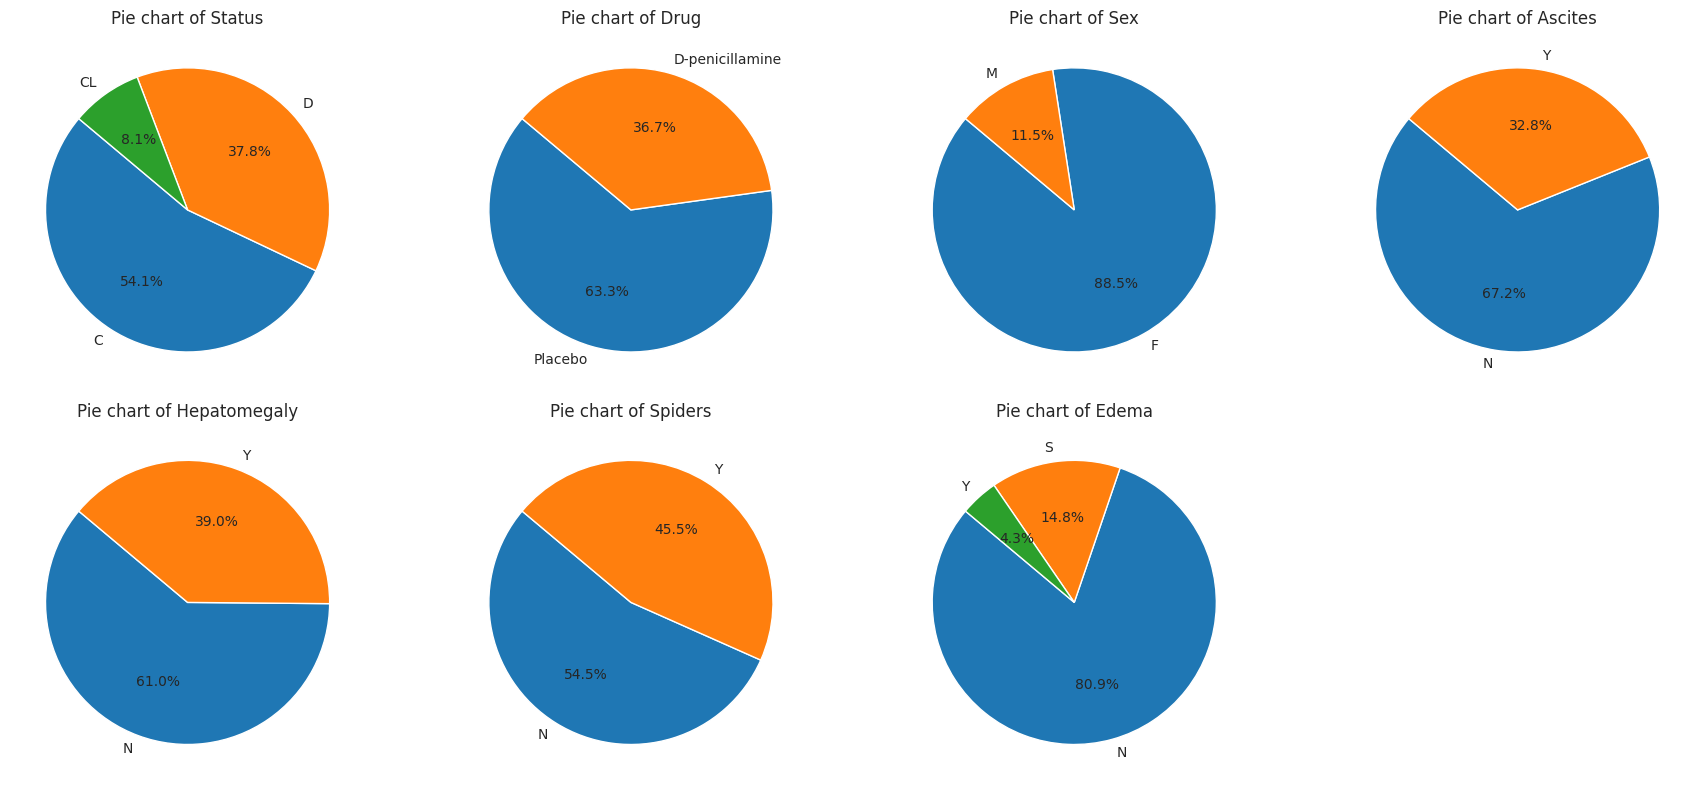

In [15]:
# Define the categorical columns
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    # Pie chart
    if len(df[column].unique()) <= 5:
        axs[i].pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
        axs[i].set_title(f'Pie chart of {column}')
    # Donut chart
    elif len(df[column].unique()) > 5 and len(df[column].unique()) <= 10:
        axs[i].pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
        axs[i].add_artist(plt.Circle((0,0),0.70,fc='white'))
        axs[i].set_title(f'Donut chart of {column}')
    # Violin swarm plot
    elif len(df[column].unique()) > 10:
        sns.violinplot(x=column, data=df, ax=axs[i])
        sns.swarmplot(x=column, data=df, color='k', alpha=0.5, ax=axs[i])
        axs[i].set_title(f'Violin Swarm Plot of {column}')
    # Strip plot
    else:
        sns.stripplot(x=column, data=df, ax=axs[i])
        axs[i].set_title(f'Strip Plot of {column}')

# Hide any extra subplots if there are fewer than 8 categorical columns
for j in range(len(categorical_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Ridgeline Plot of Bilirubin by Stage


- **Purpose**: Shows the distribution of a numeric value across several groups.
- **Representation**: Uses overlapping density plots or histograms.
- **Alignment**: All distributions are aligned along the same horizontal axis.
- **Overlap**: Slight overlap between distributions to avoid clutter.
- **Alternative**: Provides an alternative to horizon charts and small-multiple area charts.
- **Use Case**: Useful for visualizing and comparing distributions across multiple categories.

<Figure size 1200x800 with 0 Axes>

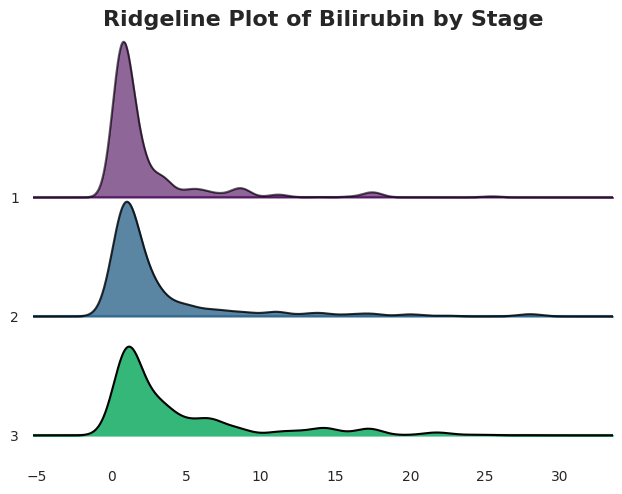

In [16]:
import joypy

plt.figure(figsize=(12, 8))
joypy.joyplot(data=df, by='Stage', column='Bilirubin', colormap=plt.cm.viridis, fade=True)
plt.title('Ridgeline Plot of Bilirubin by Stage', fontsize=16, fontweight='bold')
plt.show()

 kdeplot:


1. **Define Color Palette**:
   - A list of hexadecimal color codes is created for coloring the KDE plots.

2. **Define Numerical Columns**:
   - A list of numerical columns from the DataFrame is specified for visualization.

3. **Create Subplots**:
   - A figure is created with a specified number of rows (`num_rows`) and columns (`num_cols`) for the subplots.

4. **Flatten Axes Array**:
   - The axes array is flattened to simplify iteration over each subplot.

5. **Plot KDE for Each Column**:
   - Kernel Density Estimation (KDE) plots are generated for each numerical column.

6. **Adjust Layout and Display**:
   - The subplot layout is adjusted, and the plots are displayed.

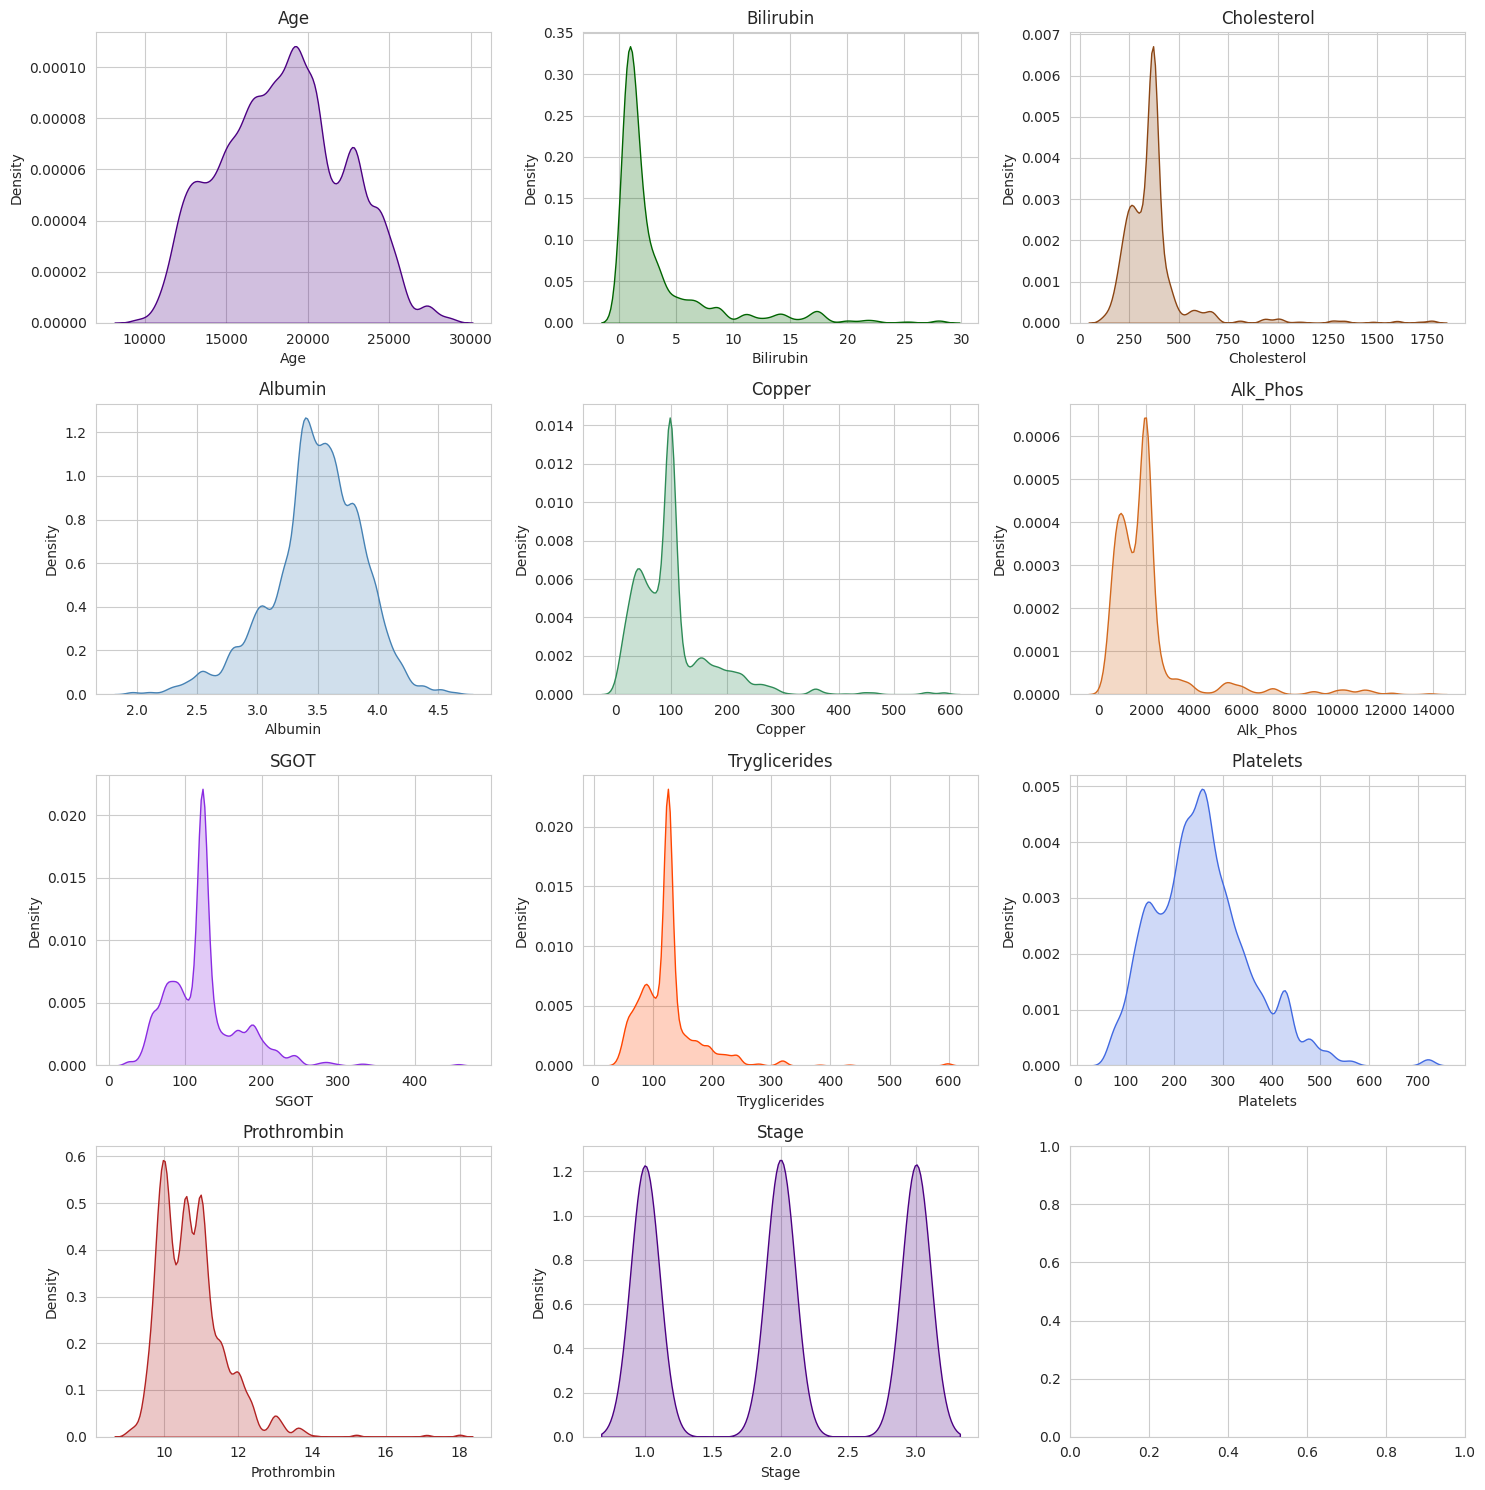

In [17]:
# Define color palette
colors = ['#4B0082', '#006400', '#8B4513', '#4682B4', '#2E8B57', '#D2691E', '#8A2BE2', '#FF4500', '#4169E1', '#B22222']

columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    color = colors[i % len(colors)]  # Reuse colors if there are more columns than colors
    sns.kdeplot(data=df[column], ax=ax, fill=True, color=color)
    ax.set_title(column)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

Scatterplot:


1. **Select Columns for Bivariate Analysis**:
   - Define a list of numerical columns for scatter plot pairs.

2. **Create Subplots**:
   - Create a figure with 3 rows and 3 columns of subplots.

3. **Flatten Axes Array**:
   - Flatten the axes array for easier iteration over each subplot.

4. **Plot Scatter Plots**:
   - Generate scatter plots for each pair of defined columns.

5. **Adjust Layout and Display**:
   - Adjust the subplot layout and display the plot.

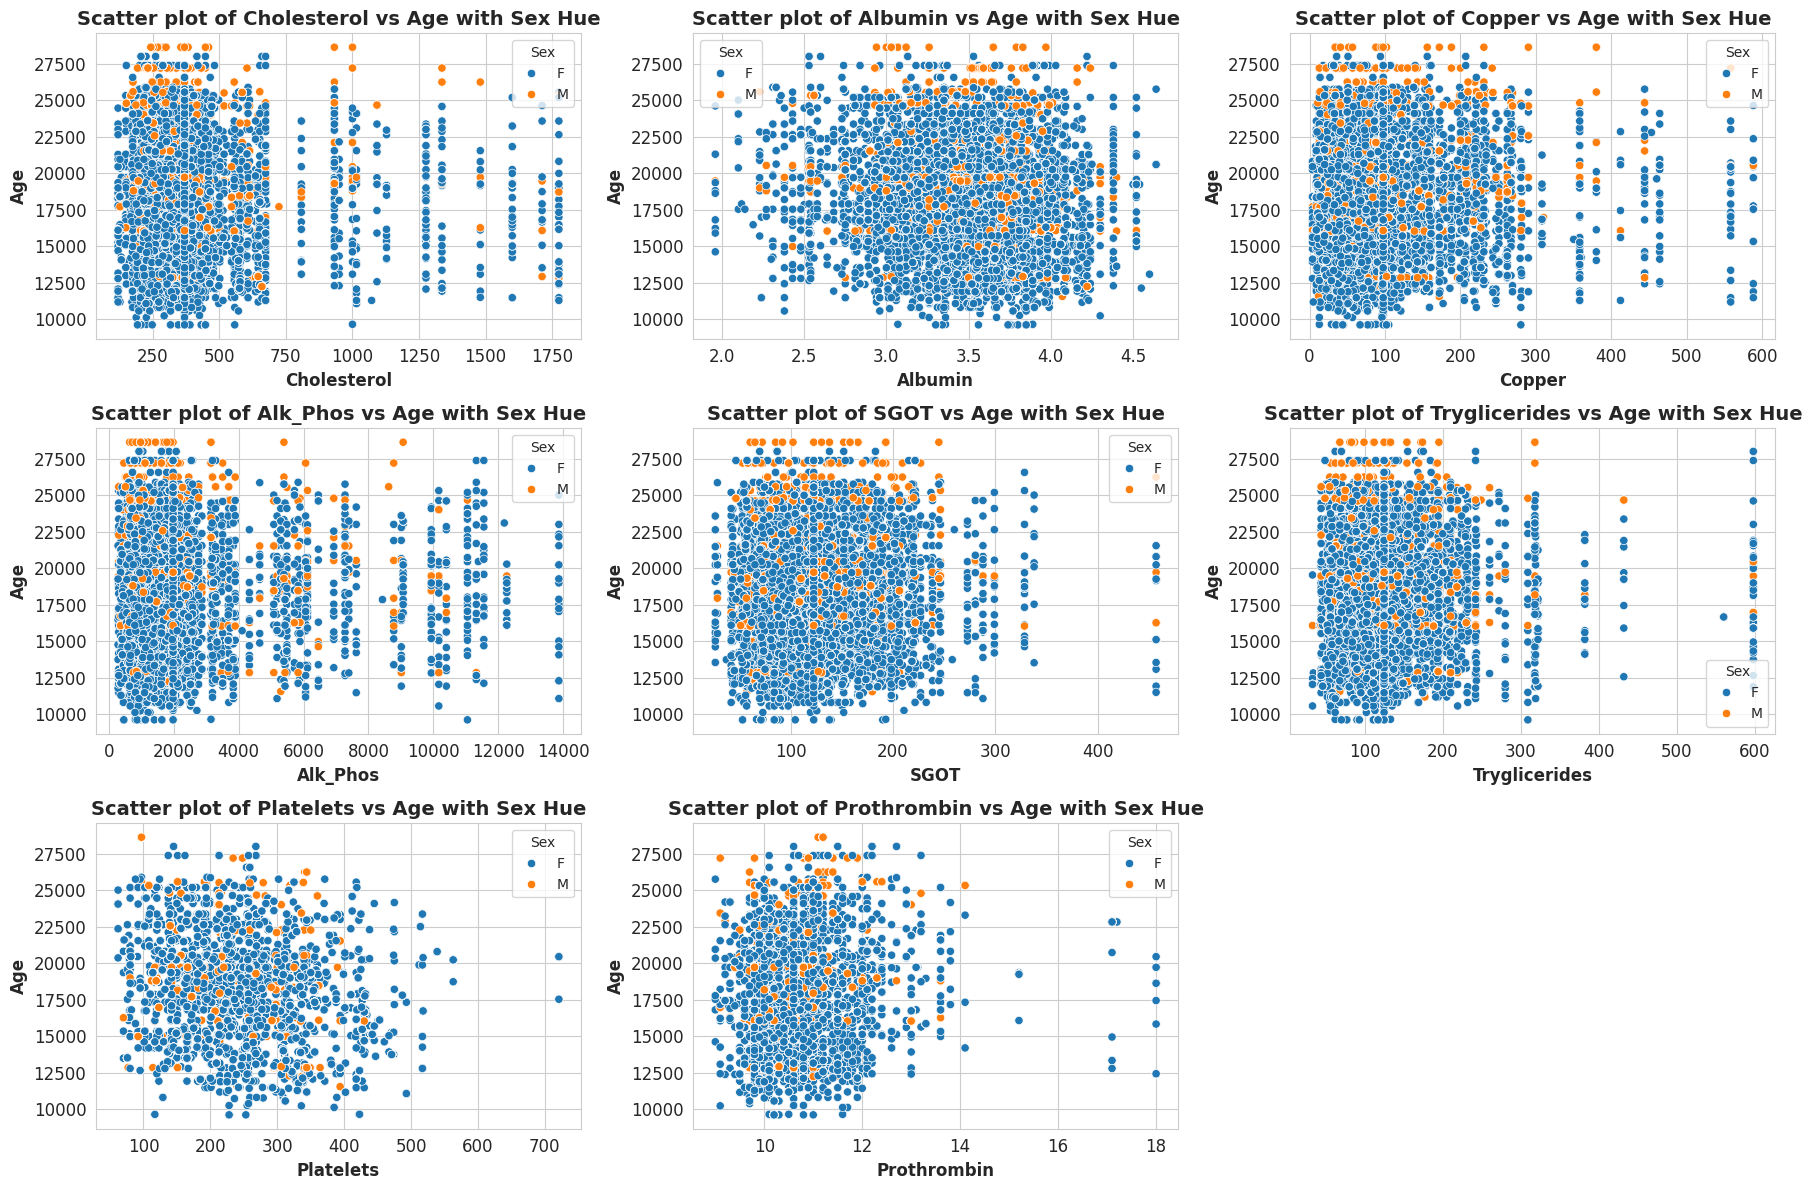

In [18]:
# Select the columns for bivariate analysis
bivariate_columns = ['Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Create a figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot scatter plots for each pair of variables with 'Sex' as hue
for i, column in enumerate(bivariate_columns):
    sns.scatterplot(x=column, y='Age', hue='Sex', data=df, ax=axs[i])
    axs[i].set_title(f'Scatter plot of {column} vs Age with Sex Hue', fontsize=14, fontweight='bold')  # Increase font size and set title to bold
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)
    axs[i].set_xlabel(column, fontsize=12, fontweight='bold')  # Increase font size and set xlabel to bold
    axs[i].set_ylabel('Age', fontsize=12, fontweight='bold')  # Increase font size and set ylabel to bold

# Hide any extra subplots if there are fewer than 12 variables
for j in range(len(bivariate_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Hierarchical Clustering Dendrogram for Correlation:


*   A dendrogram is a tree-structured graph which is used in heat maps to visualize the result of a hierarchical clustering calculation.
*  The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure. **## Hierarchical clustering:** -Hierarchical clustering is separating data into groups based on some measure of similarity, finding a way to measure how they're alike and different, and further narrowing down the data



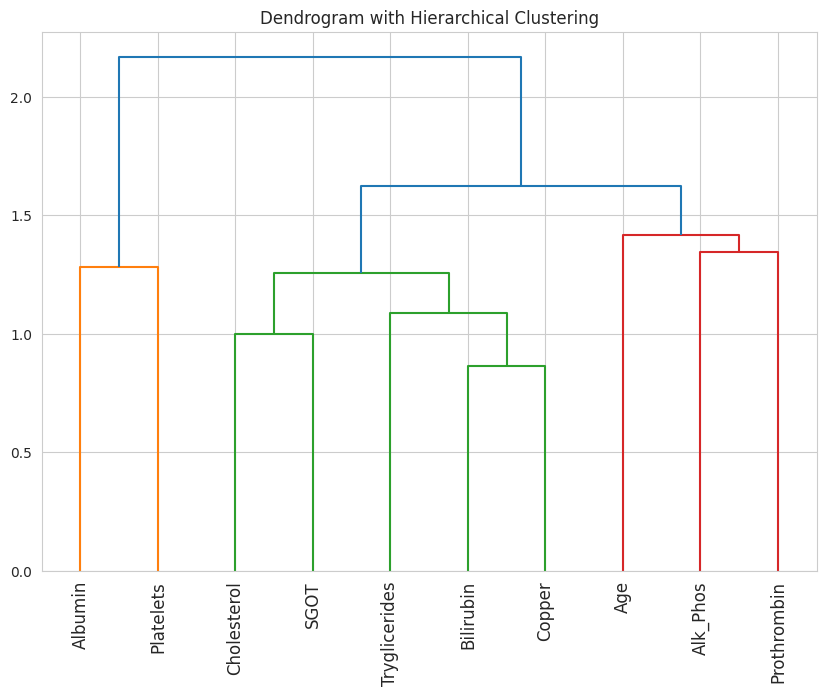

In [19]:
# Compute the correlation matrix
corr = df[['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']].corr()

# Generate the linkage matrix
link = linkage(corr, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(link, labels=corr.columns, leaf_rotation=90)
plt.title('Dendrogram with Hierarchical Clustering')
plt.show()

visualize the Numeric columns by displaying Histogram:


1. **Define Numeric Columns**:
   - List the names of numeric columns to plot.

2. **Create Subplots**:
   - Create a figure with 3 rows and 4 columns of subplots.

3. **Flatten Axes Array and Plot Histograms**:
   - Flatten the axes array and plot histograms for each numeric column.

4. **Adjust Layout and Display**:
   - Adjust the layout and display the plot.

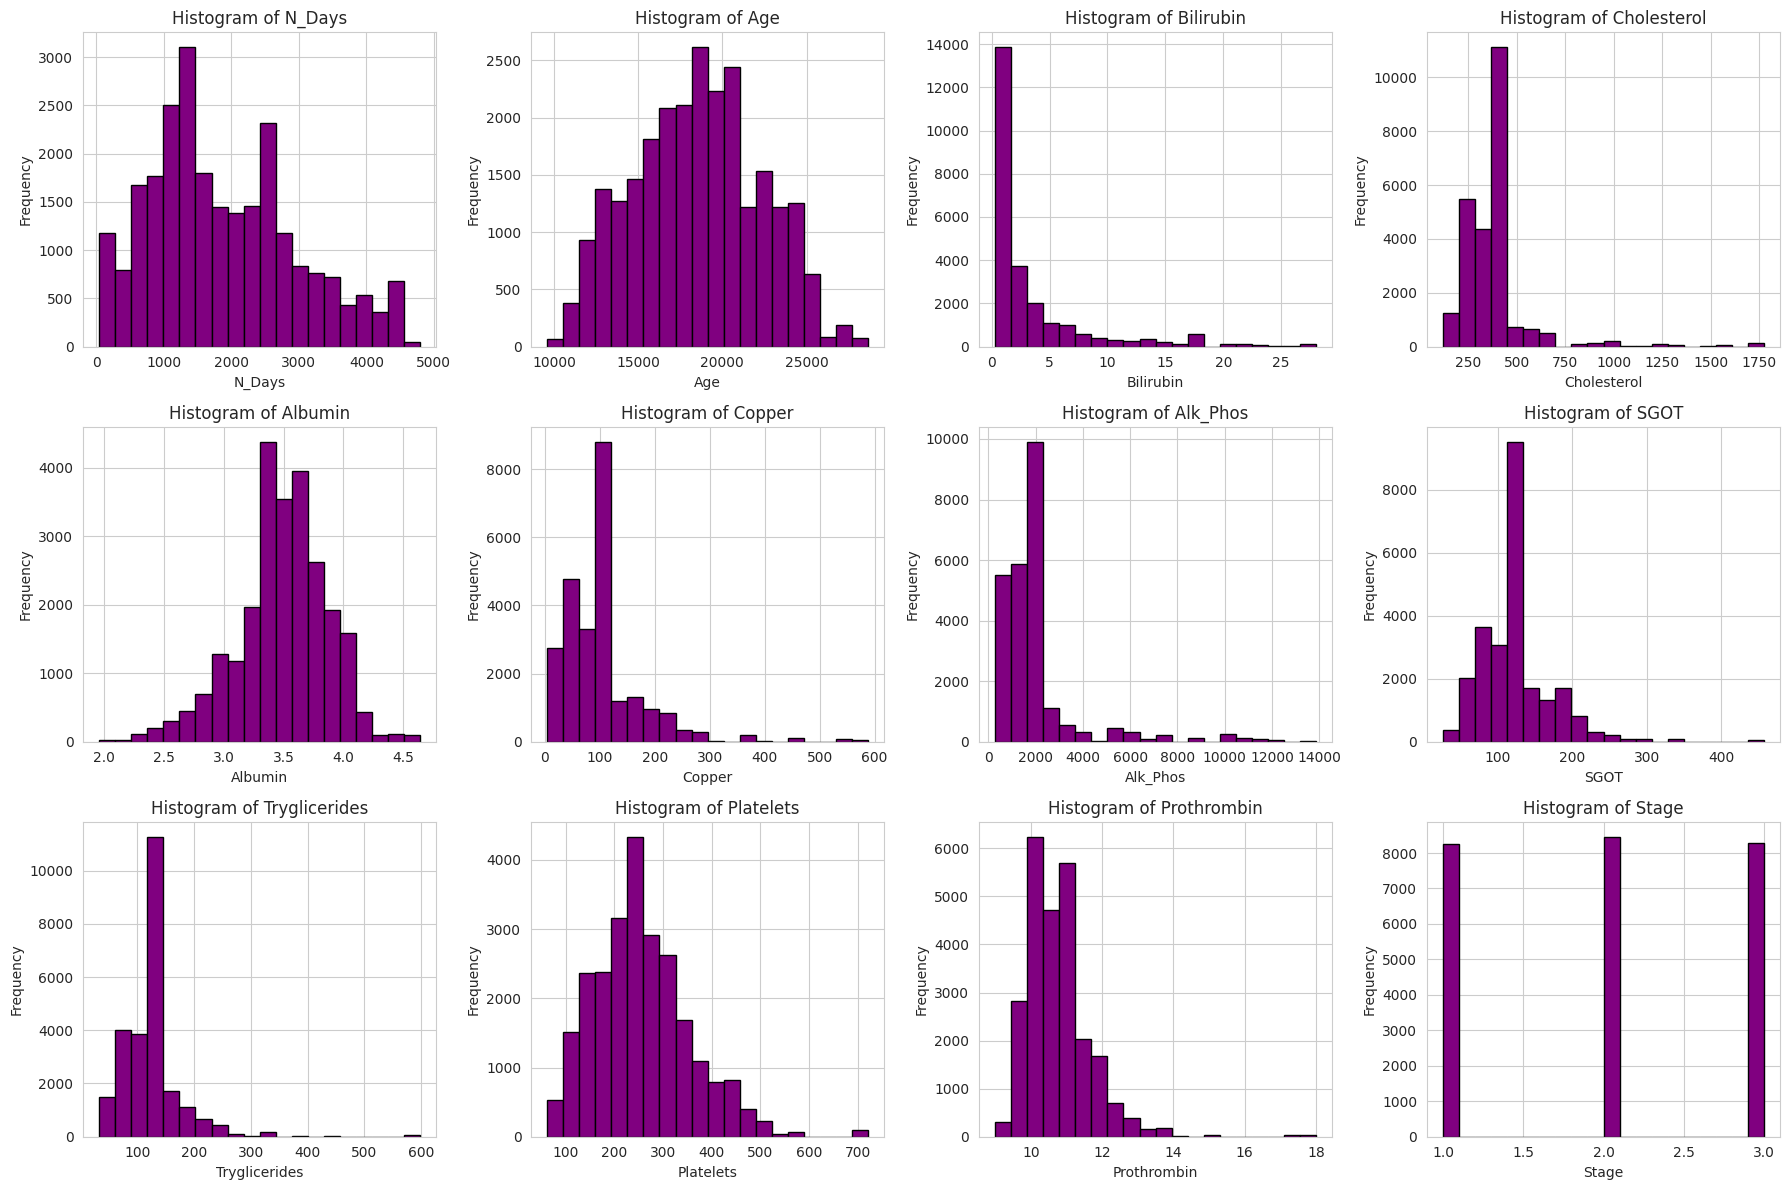

In [20]:
# Define the numeric columns
numeric_columns = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                   'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Create subplots
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot histogram for each numeric variable
for i, column in enumerate(numeric_columns):
    axs[i].hist(df[column], bins=20, color='purple', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

# Hide any extra subplots if there are fewer than 12 numeric columns
for j in range(len(numeric_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

the hexabinplot of Age vs Bilirubin:


1. **2D Histogram**:
   - A hexbin plot is a 2D histogram where bins are hexagons.

2. **Density Visualization**:
   - Color represents the number of data points in each hexagonal bin.

3. **Contiguous Areas**:
   - Hexagons allow for easily creating contiguous areas, making density visualization clear.

4. **Advantage Over Choropleth Maps**:
   - Unlike choropleths, hexbin plots eliminate size bias by representing each region equally.

5. **Bias Removal**:
   - In hexbin, larger polygons don't overemphasize the data, as in choropleths.

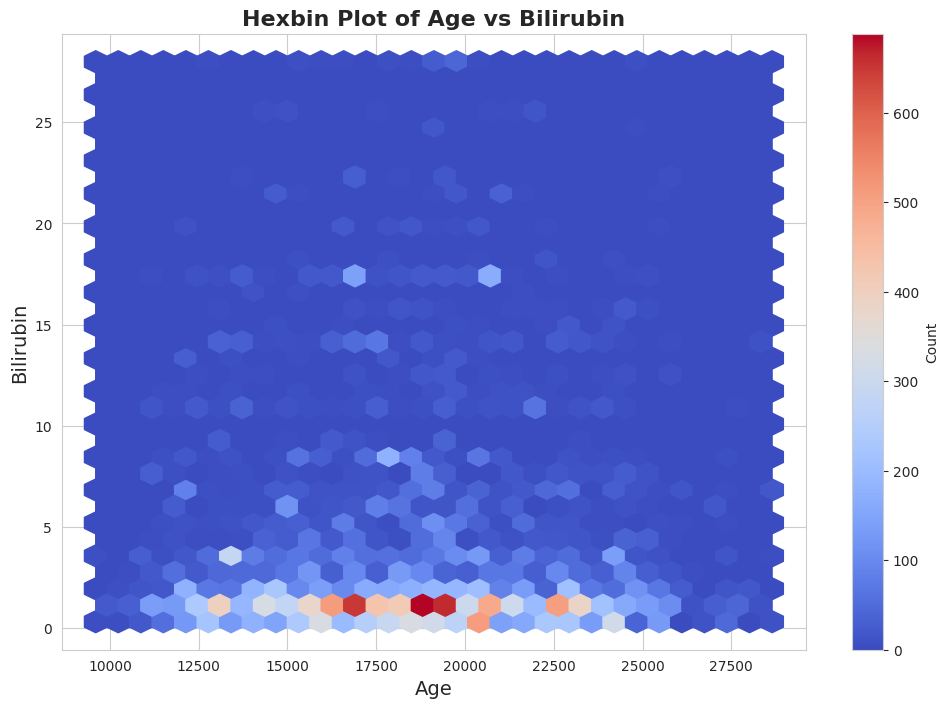

In [21]:
plt.figure(figsize=(12, 8))
plt.hexbin(df['Age'], df['Bilirubin'], gridsize=30, cmap='coolwarm')
plt.colorbar(label='Count')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Bilirubin', fontsize=14)
plt.title('Hexbin Plot of Age vs Bilirubin', fontsize=16, fontweight='bold')
plt.show()


Andrews Curves of Stage Column:


1. **High-Dimensional Visualization**:
   - Andrews curves visualize structure in high-dimensional data by mapping features from a single observation.

2. **Interpretation**:
   - Examining curve shapes reveals similarities and differences, helping identify relationships between data points.

3. **Curve Similarity**:
   - The similarity of curve shapes indicates the similarity between datapoints.

4. **Upward-Sloping Curve**:
   - Suggests a positive relationship between two variables.

5. **Downward-Sloping Curve**:
   - Suggests a negative relationship between two variables.

6. **Slope of the Curve**:
   - The slope is the ratio of vertical to horizontal change between two points on the curve.

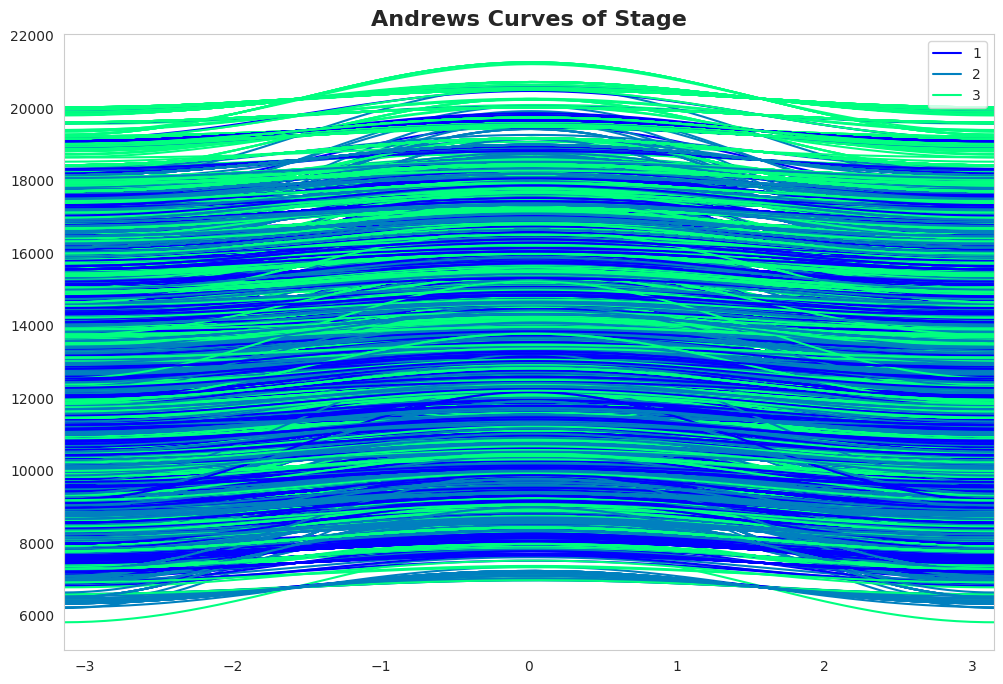

In [22]:
plt.figure(figsize=(12, 8))
andrews_curves(df[['Stage', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin']], 'Stage', colormap='winter')
plt.title('Andrews Curves of Stage', fontsize=16, fontweight='bold')
plt.show()

Boxplot and Donut Chart Visualization:

1. This code is used to generate a grid of plots
combining boxplots for numerical columns and donut charts for categorical columns.

2. Defining the Colors: A list of colors is defined which is used in the plots.

3. Select the Columns: The numerical_columns and categorical_columns lists is defined from the DataFrame.

4. Set the Seaborn Style: For the aesthetic purpose the seaborn style is set to "whitegrid".

5. Calculate the subplot Rows: Then The number of subplot rows needed for numerical columns is calculated

6. Then Create the Boxplots for Numerical Columns:

7. Then Plot Donut Charts for the Categorical Columns:

8. Then adjust the layout and display the plots

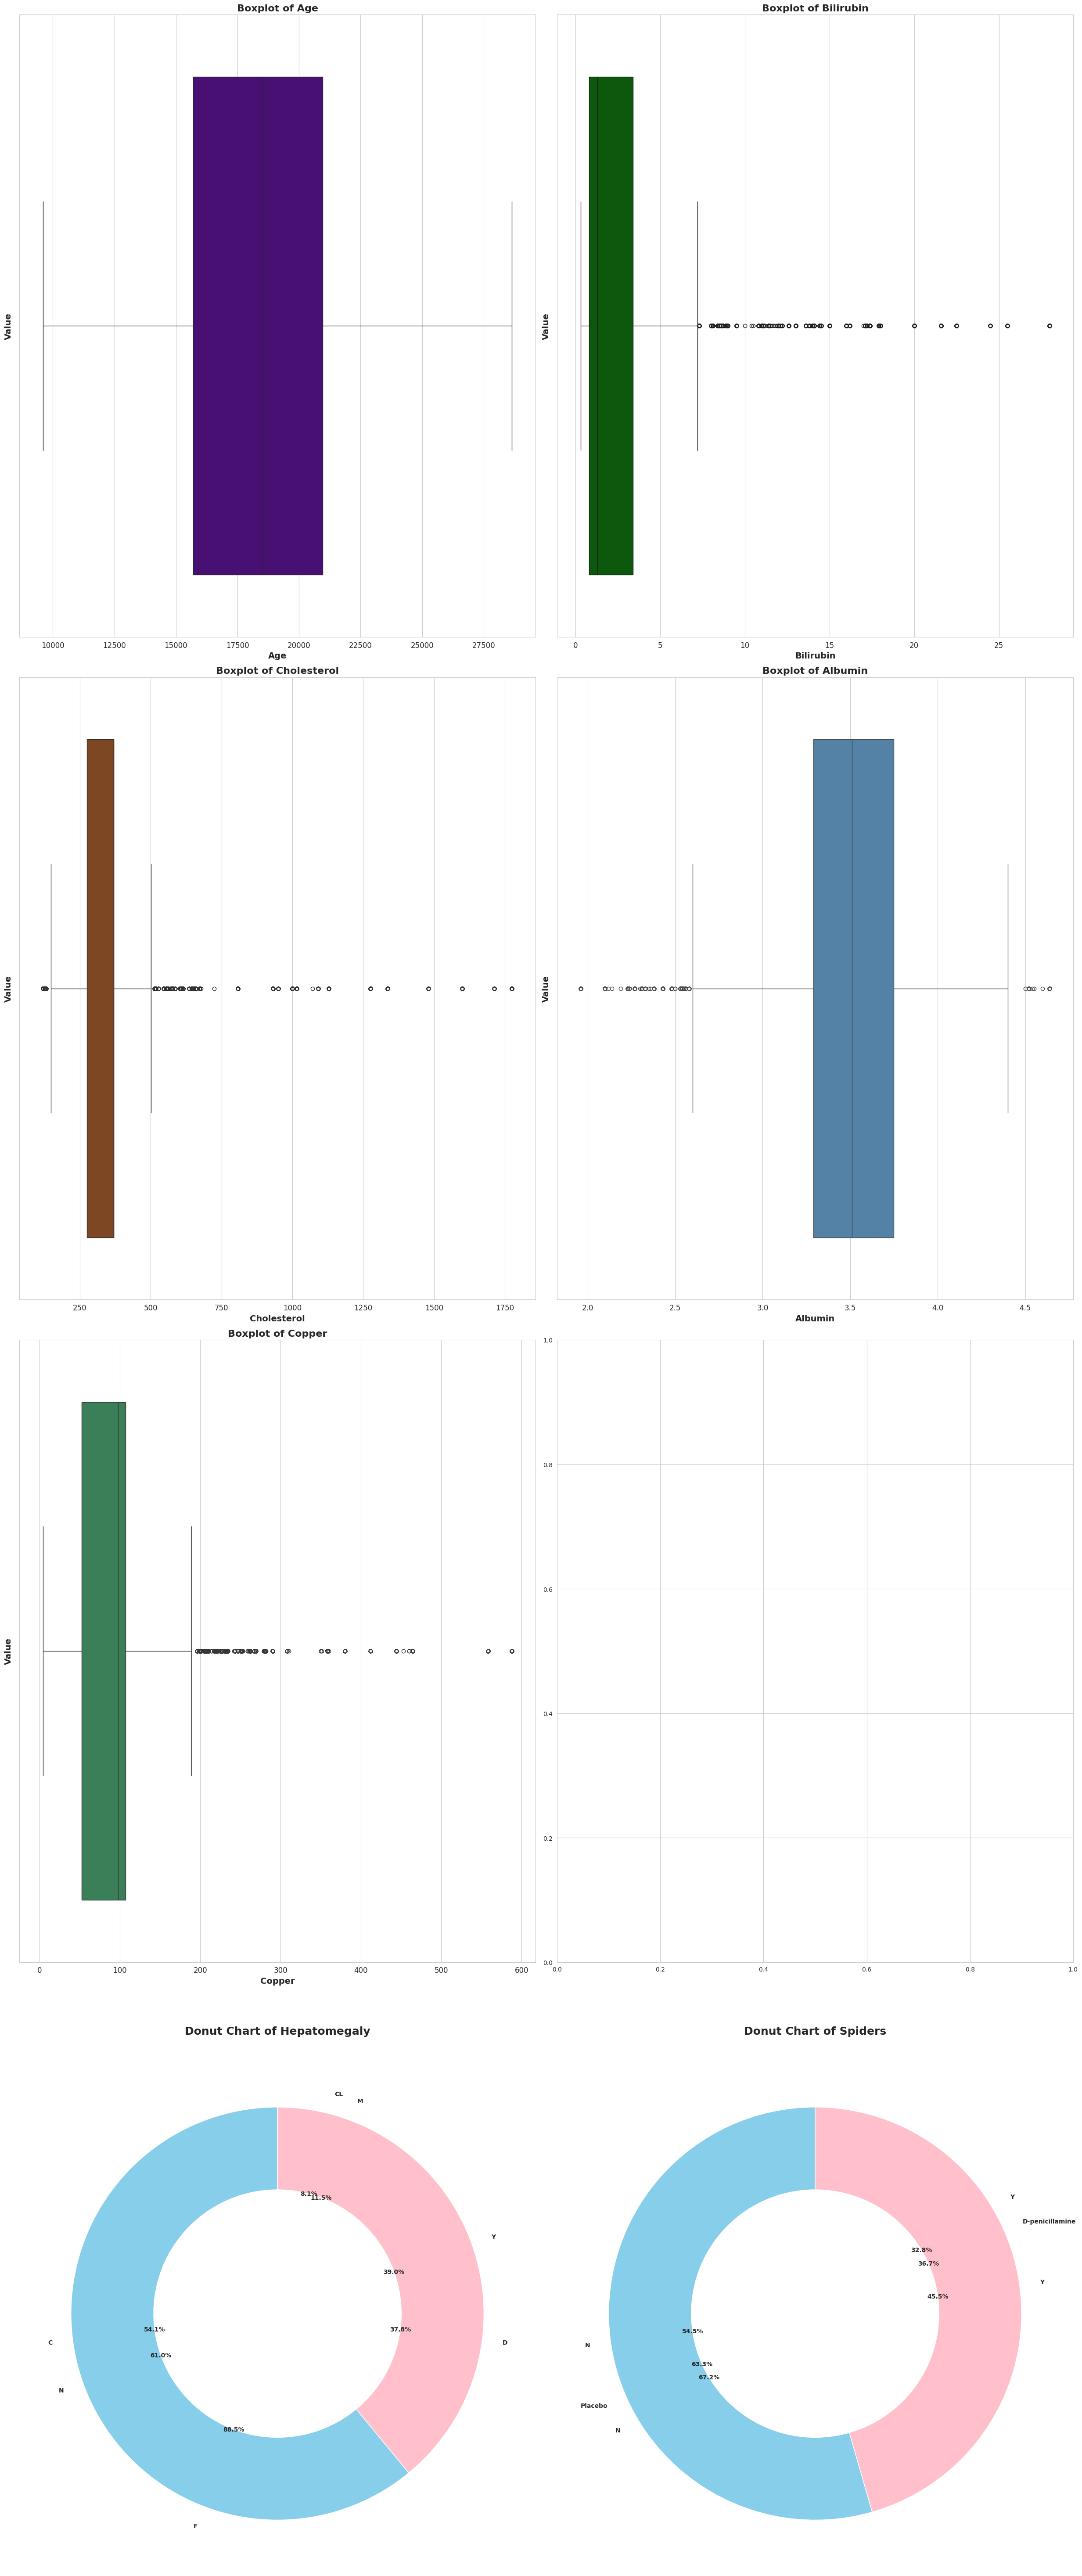

In [23]:
# Define colors
colors = ['#4B0082', '#006400', '#8B4513', '#4682B4', '#2E8B57', '#87CEEB', '#FFC0CB']

# Selecting columns
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

# Set the style for seaborn
sns.set_style("whitegrid")

# Calculate the number of subplot rows needed for numerical columns
num_numerical_cols = len(numerical_columns)
num_subplot_rows = (num_numerical_cols + 1) // 2  # Ensure at least one row

# Create a figure and subplots
fig, axes = plt.subplots(num_subplot_rows + 1, 2, figsize=(25, 15 * (num_subplot_rows + 1)))

# Plot boxplots for numerical columns
for i, col in enumerate(numerical_columns):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(x=df[col], ax=axes[row_index, col_index], color=colors[i%len(colors)])  # Reuse colors if more numerical columns
    axes[row_index, col_index].set_title(f'Boxplot of {col}', fontsize=16, fontweight='bold')  # Increase font size and set title to bold
    axes[row_index, col_index].set_xlabel(col, fontsize=14, fontweight='bold')  # Increase font size and set xlabel to bold
    axes[row_index, col_index].set_ylabel('Value', fontsize=14, fontweight='bold')  # Increase font size and set ylabel to bold
    axes[row_index, col_index].tick_params(axis='both', labelsize=12)  # Increase tick label size

# Plot donut charts for categorical columns
for i, col in enumerate(categorical_columns):
    row_index = num_subplot_rows
    col_index = i % 2
    category_counts = df[col].value_counts()
    category_labels = category_counts.index
    category_sizes = category_counts.values
    pie_colors = ['#87CEEB', '#FFC0CB']  # Light blue and light pink colors
    axes[row_index, col_index].pie(category_sizes, labels=category_labels, autopct='%1.1f%%', startangle=90, colors=pie_colors, wedgeprops=dict(width=0.4, edgecolor='w'))
    axes[row_index, col_index].set_title(f'Donut Chart of {col}', fontsize=18, fontweight='bold', pad=35)  # Increase font size, set title to bold, and add padding
    axes[row_index, col_index].tick_params(axis='both', labelsize=18)  # Increase tick label size
    for text in axes[row_index, col_index].texts:
        text.set_fontweight('bold')  # Set percentages to bold

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Outliers Detection and Removal:



1. **Select Numerical Columns**:
   - Define the columns to be used for outlier detection in the `numerical_columns` list.

2. **Calculate Z-Scores**:
   - Compute the Z-scores for each numerical column using the `zscore` function.

3. **Define Outlier Threshold**:
   - Set a threshold to identify outliers (z-score > 3 or < -3).

4. **Filter DataFrame**:
   - Exclude rows where the absolute z-score exceeds the threshold.

5. **Calculate Percentage of Outliers Before Removal**:
   - Calculate the percentage of outliers based on rows removed.

6. **Display Shape Before Outlier Removal**:
   - Print the shape of the DataFrame before removing outliers.

7. **Display Number of Removed Rows**:
   - Print the number of rows removed due to outliers.

8. **Display Percentage of Outliers Before Removal**:
   - Print the percentage of outliers in the original DataFrame.

9. **Update DataFrame**:
   - Update the DataFrame by removing outliers.

10. **Display Shape After Removal**:
    - Print the shape of the DataFrame after outliers are removed.

11. **Calculate Percentage of Outliers After Removal**:
    - Calculate the percentage of outliers after removal.

In [24]:
# Selecting numerical columns
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']

# Calculate z-scores for numerical columns
z_scores = df[numerical_columns].apply(zscore)

# Define threshold for outliers (e.g., z-score > 3)
threshold = 3

# Filter DataFrame to exclude outliers
df_no_outliers = df[(z_scores.abs() < threshold).all(axis=1)]

# Calculate the percentage of outliers before removal
outliers_percentage_before = (df.shape[0] - df_no_outliers.shape[0]) / df.shape[0] * 100

# Display the shape before removing outliers
print("DataFrame shape before removing outliers:", df.shape)

# Display the number of removed rows (outliers)
removed_rows = df.shape[0] - df_no_outliers.shape[0]
print("Number of removed rows (outliers):", removed_rows)

# Display the percentage of outliers before removal
print("Percentage of outliers before removal:", outliers_percentage_before, "%")

# Update the original DataFrame with outliers removed
df = df_no_outliers.copy()

# Display the updated DataFrame shape
print("DataFrame shape after removing outliers:", df.shape)

# Calculate the percentage of outliers after removal
outliers_percentage_after = 0  # Since all outliers have been removed, the percentage is now 0

# Display the percentage of outliers after removal
print("Percentage of outliers after removal:", outliers_percentage_after, "%")

DataFrame shape before removing outliers: (25000, 20)
Number of removed rows (outliers): 1723
Percentage of outliers before removal: 6.8919999999999995 %
DataFrame shape after removing outliers: (23277, 20)
Percentage of outliers after removal: 0 %


Lets Encode Categorical Columns

In [25]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'category' or df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

Train Test split

In [26]:
# Define the features and the target
X = df.drop(columns=['Stage'], axis=1)
y = df['Stage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [27]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Initialize and train the SVC classifier
svc = SVC()
svc.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test_scaled)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_svc))

# Evaluate the classifier
print("SVC Classifier Report:\n", classification_report(y_test, y_pred_svc))

Accuracy Score:
 0.8479381443298969
SVC Classifier Report:
               precision    recall  f1-score   support

           1       0.84      0.85      0.84      1584
           2       0.80      0.83      0.82      1538
           3       0.91      0.86      0.89      1534

    accuracy                           0.85      4656
   macro avg       0.85      0.85      0.85      4656
weighted avg       0.85      0.85      0.85      4656



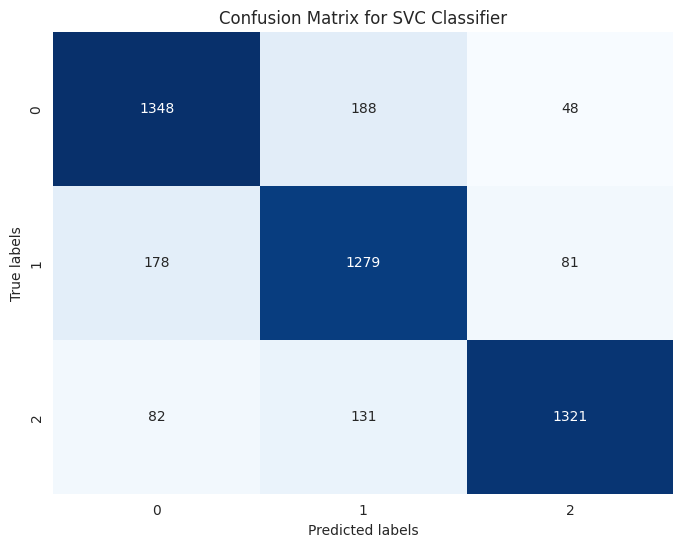

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVC Classifier')
plt.show()

Model Evaluation and Hyperparameter Tuning by creating Pipelines

In [31]:
y = y.astype(str)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class labels in y_train
unique_labels = np.unique(y_train)
print("Unique class labels in y_train:", unique_labels)

# Compute class weights for CatBoost
class_weights = compute_class_weight(class_weight='balanced', classes=unique_labels, y=y_train)
class_weights = dict(zip(unique_labels, class_weights))
print("Class weights:", class_weights)

# Define preprocessing steps for numerical features
numeric_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Feature Selection
# SelectKBest with f_classif score function
selector = SelectKBest(score_func=f_classif)

# Combine preprocessing and feature selection steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Define models
lgbm = LGBMClassifier(class_weight='balanced')
catboost = CatBoostClassifier(class_weights=class_weights, silent=True)

# Define the stacking ensemble
estimators = [
    ('LightGBM', lgbm),
    ('CatBoost', catboost)
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# Define pipelines
pipelines = {
    'LightGBM': Pipeline(steps=[('preprocessor', preprocessor),
                                ('selector', selector),
                                ('model', lgbm)]),
    'CatBoost': Pipeline(steps=[('preprocessor', preprocessor),
                                ('selector', selector),
                                ('model', catboost)]),
    'Stacking': Pipeline(steps=[('preprocessor', preprocessor),
                                ('selector', selector),
                                ('model', stacking_model)])
}

# Define hyperparameters for each model
param_grids = {
    'LightGBM': {'selector__k': [2, 4, 6, 8, 10], 'model__num_leaves': [31, 50, 100, 150], 'model__max_depth': [-1, 5, 10, 15]},
    'CatBoost': {'selector__k': [2, 4, 6, 8, 10], 'model__iterations': [100, 200, 300, 500], 'model__depth': [4, 6, 8, 10]},
    'Stacking': {'selector__k': [2, 4, 6, 8, 10], 'model__final_estimator__n_estimators': [100, 200, 300]}
}

# Perform RandomizedSearchCV for each model
results = {}
for name, pipeline in pipelines.items():
    try:
        random_search = RandomizedSearchCV(pipeline, param_distributions=param_grids[name], n_iter=50, cv=5, scoring='accuracy', random_state=42)
        random_search.fit(X_train, y_train)
        results[name] = random_search
    except Exception as e:
        print(f"Error with model {name}: {e}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [32]:
y = y.astype(str)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class labels in y_train
unique_labels = np.unique(y_train)
print("Unique class labels in y_train:", unique_labels)

# Compute class weights for CatBoost
class_weights = compute_class_weight(class_weight='balanced', classes=unique_labels, y=y_train)
class_weights = dict(zip(unique_labels, class_weights))
print("Class weights:", class_weights)

# Define preprocessing steps for numerical features
numeric_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Feature Selection
# SelectKBest with f_classif score function
selector = SelectKBest(score_func=f_classif)

# Combine preprocessing and feature selection steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Define models
lgbm = LGBMClassifier(class_weight='balanced')
catboost = CatBoostClassifier(class_weights=class_weights, silent=True)

# Define the stacking ensemble
estimators = [
    ('LightGBM', lgbm),
    ('CatBoost', catboost)
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# Define pipelines
pipelines = {
    'LightGBM': Pipeline(steps=[('preprocessor', preprocessor),
                                ('selector', selector),
                                ('model', lgbm)]),
    'CatBoost': Pipeline(steps=[('preprocessor', preprocessor),
                                ('selector', selector),
                                ('model', catboost)]),
    'Stacking': Pipeline(steps=[('preprocessor', preprocessor),
                                ('selector', selector),
                                ('model', stacking_model)])
}

# Define hyperparameters for each model
param_grids = {
    'LightGBM': {'selector__k': [2, 4, 6], 'model__num_leaves': [31, 50, 100], 'model__max_depth': [-1, 5, 10]},
    'CatBoost': {'selector__k': [2, 4, 6], 'model__iterations': [100, 200, 300]},
    'Stacking': {'selector__k': [2, 4, 6], 'model__final_estimator__n_estimators': [100, 200]}
}

# Perform GridSearchCV for each model
results = {}
for name, pipeline in pipelines.items():
    try:
        grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        results[name] = grid_search
    except Exception as e:
        print(f"Error with model {name}: {e}")

# Evaluate models
for name, result in results.items():
    print(f"Model: {name}")
    print("Best parameters:", result.best_params_)
    print("Train Accuracy:", result.best_score_)
    y_pred = result.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [33]:
if 'Stacking' in results:
    result_stacking = results['Stacking']
    y_pred_stacking = result_stacking.predict(X_test)

    print("\nEvaluation results for Stacking:")
    print("Test Accuracy:", accuracy_score(y_test, y_pred_stacking))
    print("Precision:", precision_score(y_test, y_pred_stacking, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred_stacking, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))
else:
    print("The Stacking model was not successfully trained.")

The Stacking model was not successfully trained.


In [34]:
print("Keys in results dictionary:", results.keys())

Keys in results dictionary: dict_keys(['LightGBM', 'CatBoost'])


Lets Display ConfusionMatrix of LightGBM

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Evaluate the LightGBM model
result_lightgbm = results['LightGBM']
y_pred_lightgbm = result_lightgbm.predict(X_test)

print("\nEvaluation results for LightGBM:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_lightgbm))
print("Precision:", precision_score(y_test, y_pred_lightgbm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lightgbm, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lightgbm))


Evaluation results for LightGBM:
Test Accuracy: 0.9649914089347079
Precision: 0.9649728841441382
Recall: 0.9649914089347079
Confusion Matrix:
 [[1521   45   18]
 [  43 1472   23]
 [  16   18 1500]]


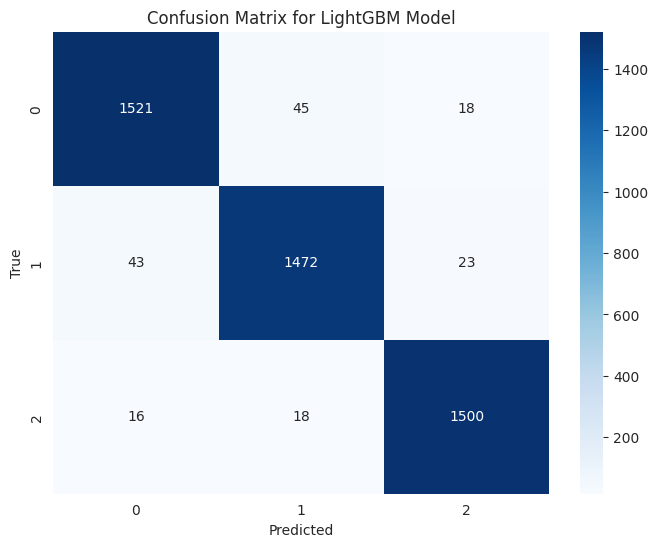

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm_lightgbm = confusion_matrix(y_test, y_pred_lightgbm)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lightgbm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for LightGBM Model')
plt.show()

In [37]:
# Evaluate the CatBoost model
result_catboost = results['CatBoost']
y_pred_catboost = result_catboost.predict(X_test)

print("\nEvaluation results for CatBoost:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("Precision:", precision_score(y_test, y_pred_catboost, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_catboost, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))


Evaluation results for CatBoost:
Test Accuracy: 0.9559707903780069
Precision: 0.9559961562811009
Recall: 0.9559707903780069
Confusion Matrix:
 [[1502   54   28]
 [  40 1468   30]
 [  25   28 1481]]


Lets Display ConfusionMatrix of CatBoost

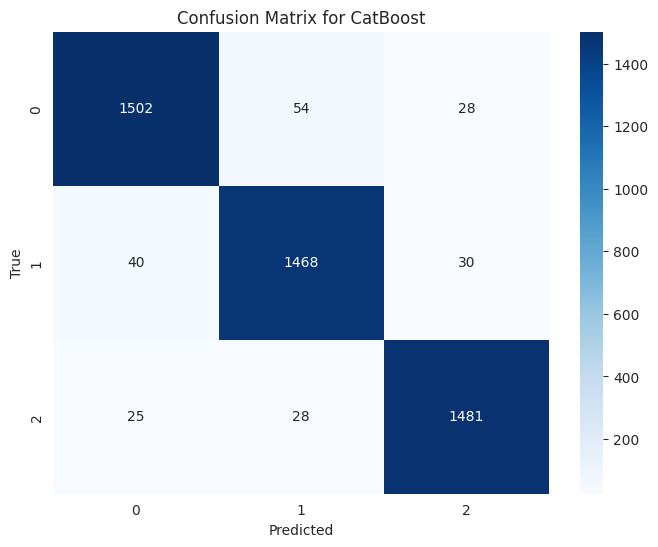

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CatBoost')
plt.show()

**Conclusion**


1. **Dataset Overview**:
   - The dataset explores liver cirrhosis stage detection with 25,000 rows and 19 columns.

2. **Visualizations**:
   - Various plots are created: barplot, histogram, hexbin, pie chart, ridge plot, scatter plot, KDE plot, dendrogram, Andrews curve, etc.

3. **Data Insights**:
   - 15,361 duplicates are found and removed.
   - 6.93% outliers are identified and removed.

4. **Modeling**:
   - Applied various models: Decision Tree, Random Forest, KNN, SVC, GaussianNB, LightGBM, and CatBoost.

5. **Best Model**:
   - LightGBM performs best with 96% accuracy, indicating strong model performance.

In [43]:
import pandas as pd

# 1. Load your original data
data = pd.read_csv('liver_cirrhosis.csv')  # Make sure your dataset is correctly loaded

# 2. Define your cleaning function (if not already defined)
def clean_data(data):
    # Example: Remove rows with missing values
    cleaned_data = data.dropna()  # Replace with your actual cleaning steps if any
    return cleaned_data

# 3. Apply the cleaning function to your data to create 'processed_data'
processed_data = clean_data(data)  # Now you have the cleaned data

# 4. Save the cleaned data to a CSV file
processed_data.to_csv('cleaned_liver_cirrhosis_data.csv', index=False)
